### Exercise - 1:

1. Read and display the image.

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

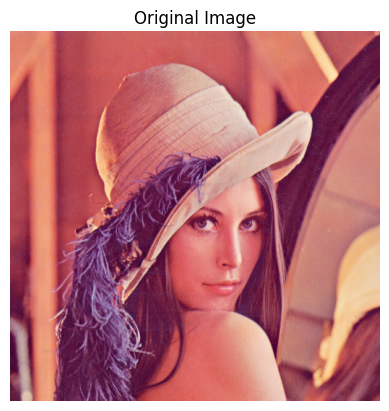

In [62]:
# Open the image using Pillow
image = Image.open("Lenna.png")

# Display the image using Matplotlib
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

This code uses the Pillow library to open an image "Lenna.png" and Matplotlib to display it. Image.open() loads the image, and plt.imshow(image) renders it and plt.show() displays the image.

2. Display only the top left corner of 100x100 pixels.

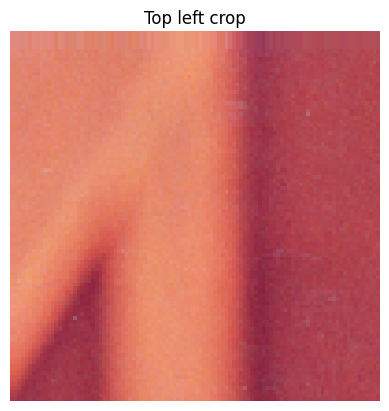

In [63]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Extract the top-left 100x100 pixels
top_left_crop = image_array[:100, :100]

# Display the cropped image using Matplotlib
plt.imshow(top_left_crop)
plt.title("Top left crop")
plt.axis("off")
plt.show()

After the image is opened using Pillow and it is converted into a NumPy array. It then extracts the top-left 100x100 pixel region using array slicing (image_array[:100, :100]). Finally, Matplotlib is used to display the section.

3. Show the three color channels (R, G, B).

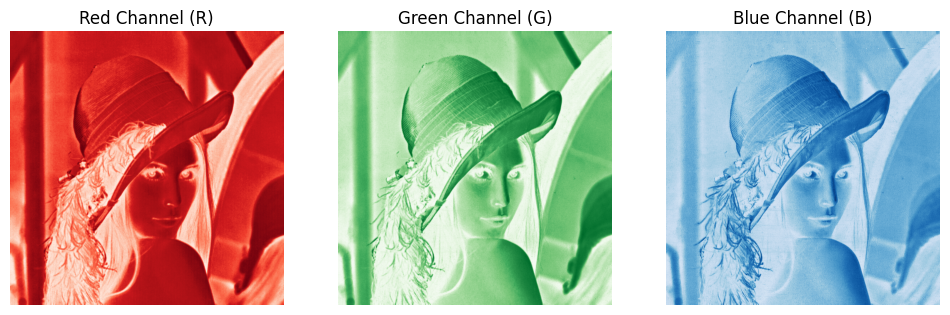

In [64]:
# Extract Red, Green, and Blue channels
R = image_array[:, :, 0]  # Red channel
G = image_array[:, :, 1]  # Green channel
B = image_array[:, :, 2]  # Blue channel

# Plot the channels separately
plt.figure(figsize=(12, 4))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(R, cmap="Reds")  # Display in red colormap
plt.title("Red Channel (R)")
plt.axis("off")

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(G, cmap="Greens")  # Display in green colormap
plt.title("Green Channel (G)")
plt.axis("off")

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(B, cmap="Blues")  # Display in blue colormap
plt.title("Blue Channel (B)")
plt.axis("off")

plt.show()

This code extracts and displays the Red, Green, and Blue (RGB) color channels. The red channel is accessed using image_array[:, :, 0], the green channel with image_array[:, :, 1], and the blue channel with image_array[:, :, 2]. Each channel is then visualized separately using Matplotlib subplots. Then, plt.show() renders the images side by side.

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

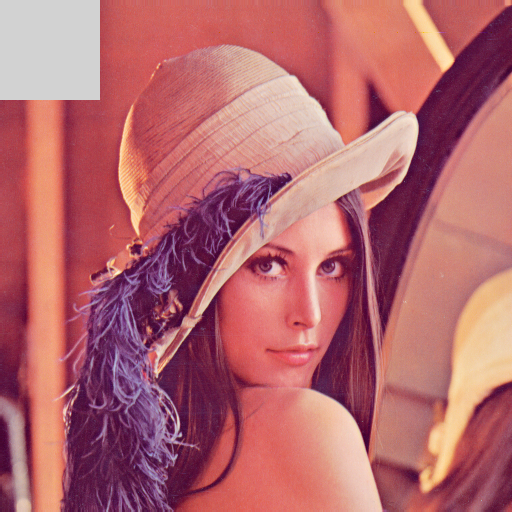

In [65]:
# Modify the top-left 100x100 pixels to a light gray color
image_array[:100, :100] = 210

# Convert back to an image
modified_image = Image.fromarray(image_array)
# Display the modified image
display(modified_image)

This code modifies the top-left 100x100 pixels of an image to a light gray color by setting the pixel values to 210 and the modified NumPy array is converted back into an image and displayed.

### Exercise - 2:

1. Load and display a grayscale image.

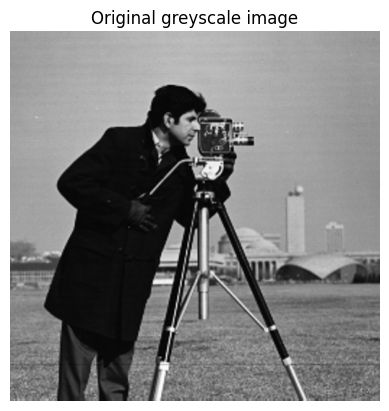

In [66]:
# Open the grayscale image using Pillow
image = Image.open("cameraman.png")

# Display the grayscale image using Matplotlib
plt.imshow(image, cmap="gray")
plt.title("Original greyscale image")
plt.axis("off")
plt.show()

This code uses the Pillow library to open an image "cameraman.png" and Matplotlib to display it. Image.open() loads the image, and plt.imshow(image) renders it and plt.show() displays the image.

2. Extract and display the middle section of the image (150 pixels).

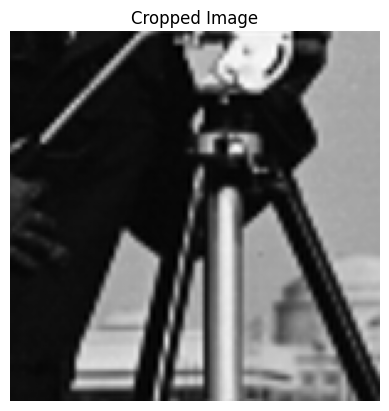

In [67]:
# Convert the image to a NumPy array
image_array = np.array(image)

# Get the dimensions of the image
height, width = image_array.shape

# Calculate the coordinates for the center crop (150x150)
top = (height - 150) // 2
left = (width - 150) // 2
bottom = top + 150
right = left + 150

# Extract the middle 150x150 section
cropped_image = image_array[top:bottom, left:right]

# Display the cropped image using Matplotlib
plt.imshow(cropped_image, cmap="gray")
plt.title("Cropped Image")
plt.axis("off")
plt.show()

After the image is loaded and converted into a NumPy array for manipulation. The dimensions of the image are used to calculate the coordinates of the center, and then a 150x150 pixel region is extracted using array slicing. The resulting cropped image is displayed using Matplotlib, with the 'gray' colormap to ensure it appears in grayscale.

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

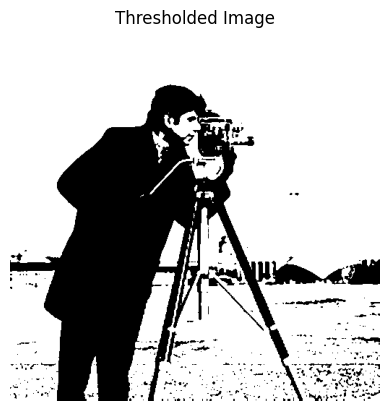

In [68]:
#set values below 100 to 0, and above 100 to 255
thresholded_image = np.where(image_array < 100, 0, 255)

# Display the resulting binary image
plt.imshow(thresholded_image, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

After the image is loaded and converted into a NumPy array for manipulation. The np.where() function is used to apply the threshold: pixels less than 100 are turned to 0, and pixels greater than or equal to 100 are set to 255. Finally, the resulting binary image is displayed using Matplotlib.

4. Rotate the image 90 degrees clockwise and display the result.

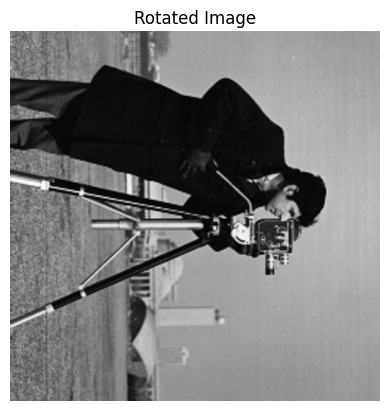

In [69]:
# Rotate the image 90 degrees clockwise
rotated_image = image.rotate(-90, expand=True)

# Display the rotated image using Matplotlib
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image")
plt.axis("off")
plt.show()

This code rotates the image 90 degrees clockwise using the Pillow library's rotate() method with -90 degrees, which specifies a clockwise rotation. The expand=True argument ensures the image size is adjusted to accommodate the rotated image without cutting off any part. The rotated image is displayed using Matplotlib.

5. Convert the grayscale image to an RGB image.

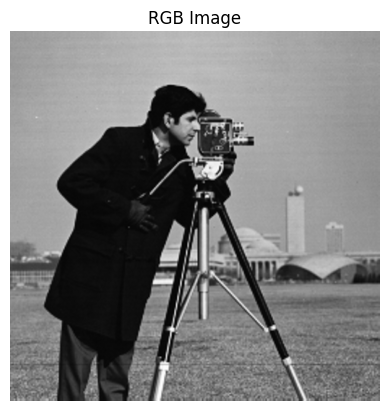

In [70]:
# Convert the grayscale image to RGB
rgb_image_array = np.stack([image_array] * 3, axis=-1)

# Convert the NumPy array back to an image
rgb_image = Image.fromarray(rgb_image_array)

# Display the converted RGB image using Matplotlib
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.axis("off")
plt.show()

After the grayscale image is loaded and converted to a NumPy array, the np.stack() function is used to replicate the grayscale values across the three channels, effectively creating an RGB image where each channel contains the same grayscale intensity. The resulting NumPy array is converted back into an image using Image.fromarray(), and the image is displayed using Matplotlib.

### Image Compression and Decompression using PCA.

1. Load and Prepare Data:

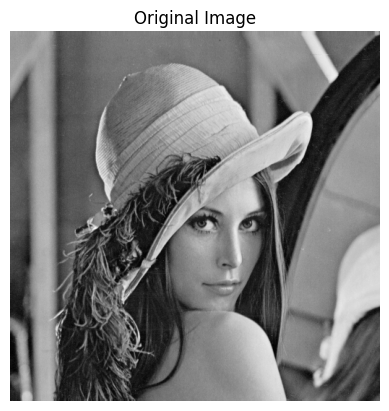

In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image
image = Image.open("lena_gray.png")

# Convert the image to a NumPy array
image_array = np.array(image)
height , width = image_array . shape
data = image_array . reshape ( height , width )

mean_image = np.mean(image_array)  # Calculate the mean of the entire image
centered_image = image_array - mean_image  # Subtract the mean from all pixel values

covariance_matrix = np.cov(centered_image, rowvar=False)

plt.imshow(centered_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

Heree, a grayscale image is loaded using the Pillow library, and it is then converted into a NumPy array. The mean of all pixel values in the image is calculated, and this mean is subtracted from each pixel value to center the data. After centering, the covariance matrix of the image is computed, which helps to understand how the pixel values vary together. This process prepares the image for further analysis, such as principal component analysis (PCA).

2. Eigen Decomposition and Identifying Principal Components:

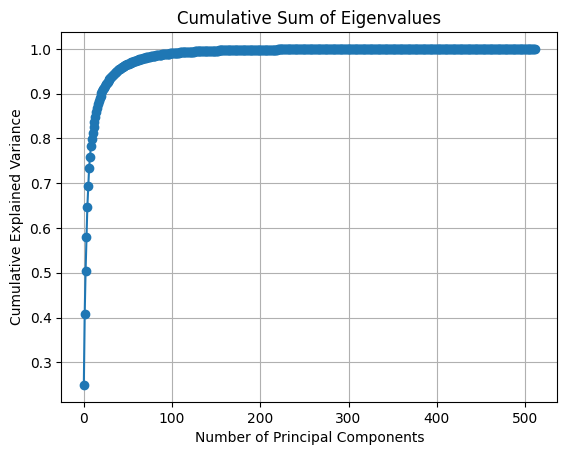

In [72]:
#Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]  # Sorted eigenvalues
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Corresponding eigenvectors

#Select the top k eigenvectors (based on eigenvalues)
k = 10
top_eigenvectors = sorted_eigenvectors[:, :k]

#Cumulative Sum Plot for Eigenvalues
cumulative_sum = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)  # Cumulative sum of eigenvalues
plt.plot(cumulative_sum, marker='o')
plt.title("Cumulative Sum of Eigenvalues")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

After calculating the covariance matrix of the image, eigenvalues and eigenvectors are computed using np.linalg.eigh(), which is specifically designed for symmetric matrices like the covariance matrix. The eigenvalues are then sorted in descending order, which helps in identifying the most important components. The corresponding eigenvectors are also sorted accordingly. The top k eigenvectors are selected, which represent the most significant principal components of the image. A cumulative sum plot is generated to visualize how much variance each principal component explains.

3. Reconstruction and Experiment:

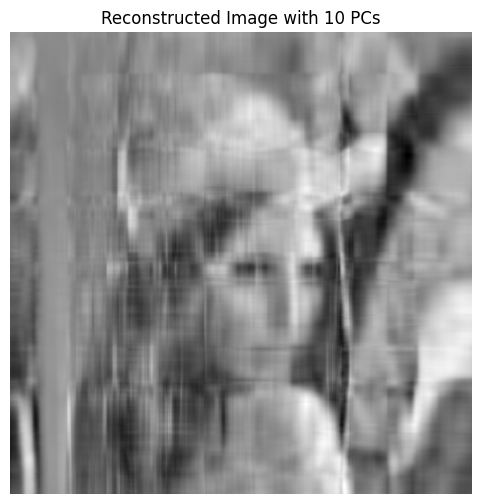

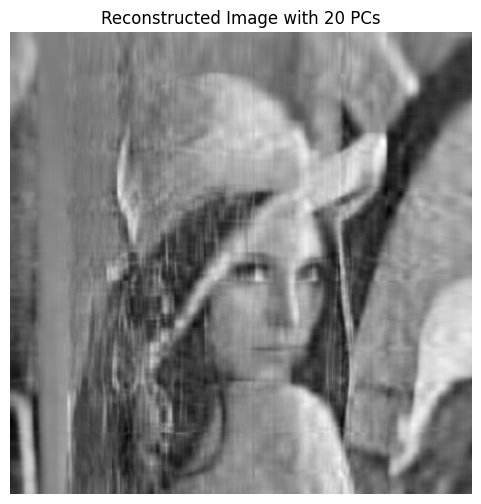

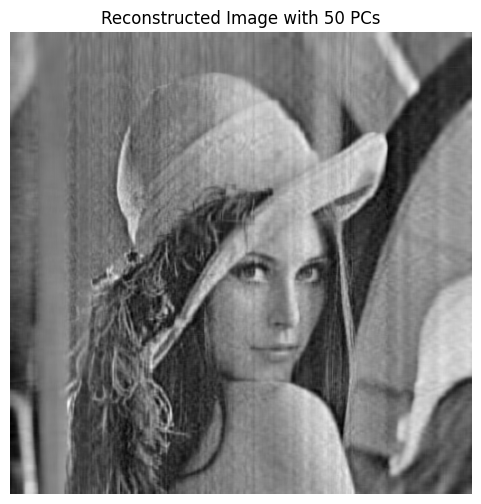

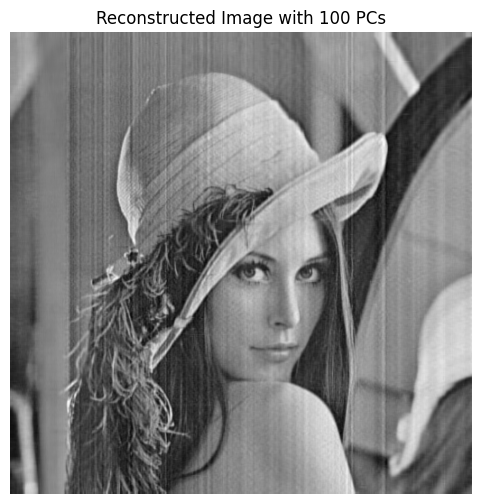

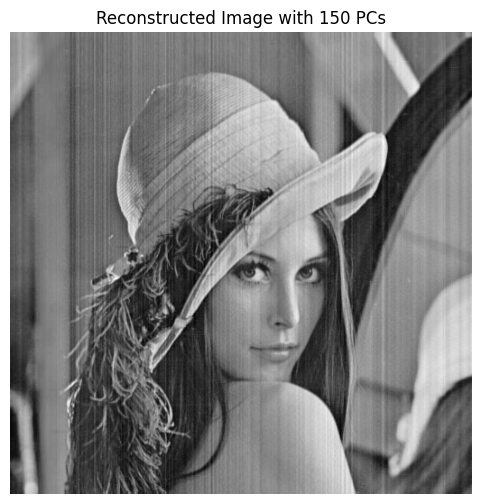

Explained variance for 10 PCs: 0.7983
Explained variance for 20 PCs: 0.8954
Explained variance for 50 PCs: 0.9655
Explained variance for 100 PCs: 0.9902
Explained variance for 150 PCs: 0.9963


In [73]:
k_values = [10, 20, 50, 100, 150]

# Store the reconstructed images for comparison
reconstructed_images = []

# Loop through different values of k
for k in k_values:
    top_eigenvectors = sorted_eigenvectors[:, :k]  # Select the top k eigenvectors
    projection = np.dot(centered_image, top_eigenvectors)
    reconstructed_image = np.dot(projection, top_eigenvectors.T) + mean_image  # Adding back the mean

    reconstructed_images.append(reconstructed_image)

    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"Reconstructed Image with {k} PCs")
    plt.axis("off")
    plt.show()

# Print the cumulative variance values for each experiment
for k in k_values:
    print(f"Explained variance for {k} PCs: {cumulative_sum[k-1]:.4f}")

 The values of k used are 10, 20, 50, 100, and 150. For each value of k, the image is projected onto the top k eigenvectors, which reduces the image's dimensionality. Then, the image is reconstructed by multiplying the projection with the transpose of the selected eigenvectors and adding back the mean to bring the image back to its original scale. Each reconstructed image is displayed.